### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.

There are five different types of coupons:

- less expensive restaurants (under \\$20)
- coffee houses
- carry out & take away
- bar
- expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.

To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. 

You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  gender: male, female
    -  age: below 21, 21 to 25, 26 to 30, etc.
    -  maritalStatus: Marital Status with values single, married partner, unmarried partner, or widowed
    -  has_children: Number of children with values 0, 1, or more than 1
    -  education: high school, bachelors degree, associates degree, or graduate degree
    -  occupation: architecture & engineering, business & financial, etc.
    -  income: Annual income with values less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Bar: Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  CarryAway: Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  CoffeeHouse: Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  RestaurantLessThan20: Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    - Restaurant20To50: Number of times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month.


2. Contextual attributes
    - destination: Driving destination with values home, work, or no urgent destination
    - weather: sunny, rainy, or snowy
    - temperature: 30F, 55F, or 80F
    - time: 10AM, 2PM, or 6PM
    - passanger: Passenger with values alone, partner, kid(s), or friend(s)
    - car: Info about the car being drive.
    - toCoupon_GEQ15min: Driving distance to the restaurant/bar for using the coupon is greater than 15 minutes, values 0, 1
    - toCoupon_GEQ25min: Driving distance to the restaurant/bar for using the coupon is greater than 25 minutes, values 0, 1
    - direction_same: Whether the restaurant/bar is in the same direction as your current destination, values 0, 1
    - direction_opp: Whether the restaurant/bar is in the same direction as your current destination, values 1, 0


3. Coupon attributes
    - expiration: time before it expires: 2 hours or one day
    - y: accept the coupon:
      - "Right away",“Later, before the coupon expires" 1
      - "No, I do not want the coupon" 0
    - coupon: type of coupon with values: Restaurant(<\\$20), Coffee House, Carry out &amp; Take away, Bar, Restaurant(\\$20-\\$50)


In [595]:
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns



# Problems

Use the prompts below to get started with your data analysis.

## 1. Read in the `coupons.csv` file.




In [596]:
df = pd.read_csv('data/coupons.csv')

In [597]:
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

We need to display the columns information

In [599]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [600]:
df.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

Tell pandas to display all columns

In [601]:
# Set options to display all rows and columns
pd.set_option('display.max_columns', None)

#display dataset info
df


destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner   
1               Coffee House         2h  Female  21  Unmarried partner   
2      Carry out & Take away         2h  Female  21  Unmarried partner   
3               Coffee House         2h  Female  21  Unmarried partner   
4               Coffee House         1d  Female  21  Unmarried partner   
...                      ...        ...     ...  ..                ...   
12679  Carry out & Take away         1d    Male  26             Single   
12680  Carry out & Take away         1d    Male  26             Single   
12681           Coffee House         1d    Male  26             Single   
12682                    Bar         1d    Male  26             Single   
12683      Restaurant(20-50)         2h    Male  26             Single   

       has_children                 education       occupation  \
0                 1  Some college - no degree       Unemployed   
1                 1  Some college - no degree       Unemployed   
2                 1  Some college - no degree       Unemployed   
3                 1  Some college - no degree       Unemployed   
4                 1  Some college - no degree       Unemployed   
...             ...                       ...              ...   
12679             0          Bachelors degree  Sales & Related   
12680             0          Bachelors degree  Sales & Related   
12681             0          Bachelors degree  Sales & Related   
12682             0          Bachelors degree  Sales & Related   
12683             0          Bachelors degree  Sales & Related   

                income  car    Bar CoffeeHouse CarryAway RestaurantLessThan20  \
0      $37500 - $49999  NaN  never       never       NaN                  4~8   
1      $37500 - $49999  NaN  never       never       NaN                  4~8   
2      $37500 - $49999  NaN  never       never       NaN                  4~8   
3      $37500 - $49999  NaN  never       never       NaN                  4~8   
4      $37500 - $49999  NaN  never       never       NaN                  4~8   
...                ...  ...    ...         ...       ...                  ...   
12679  $75000 - $87499  NaN  never       never       1~3                  4~8   
12680  $75000 - $87499  NaN  never       never       1~3                  4~8   
12681  $75000 - $87499  NaN  never       never       1~3                  4~8   
12682  $75000 - $87499  NaN  never       never       1~3                  4~8   
12683  $75000 - $87499  NaN  never       never       1~3                  4~8   

      Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0                  1~3                 1                  0   
1                  1~3                 1                  0   
2                  1~3                 1                  1   
3                  1~3                 1                  1   
4                  1~3                 1                  1   
...                ...               ...                ...   
12679              1~3                 1                  0   
12680              1~3                 1                  0   
12681              1

In [602]:
#reset dsiplay max columns
pd.reset_option('display.max_columns')

## 2. Investigate the dataset for missing or problematic data.

In [603]:
# Looking for null values in columns
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

rows with null values:
- car
- Bar
- CoffeeHouse
- CarryAway
- RestaurantLessThan20
- Restaurant20To50.

Consulting the shape of data to see we need to drop features

In [604]:
df.shape

(12684, 26)

In [605]:
# Number of NaN values in the 'car' column
nan_car = df['car'].isnull().sum()

# Total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of NaN values in the 'car' column
percentage_nan_car = (nan_car / total_rows) * 100

# Print the result
print(f"Percentage of NaN values in 'car' column: {percentage_nan_car:.2f}%")

Percentage of NaN values in 'car' column: 99.15%


In [606]:
#Consulting diff values fo car
df['car'].unique()
df['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Analyzing Nulls at CoffeeHouse,CarryAway,RestaurantLessThan20 and Restaurant20To50

In [607]:
df[['CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]

CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
0           never       NaN                  4~8              1~3
1           never       NaN                  4~8              1~3
2           never       NaN                  4~8              1~3
3           never       NaN                  4~8              1~3
4           never       NaN                  4~8              1~3
...           ...       ...                  ...              ...
12679       never       1~3                  4~8              1~3
12680       never       1~3                  4~8              1~3
12681       never       1~3                  4~8              1~3
12682       never       1~3                  4~8              1~3
12683       never       1~3                  4~8              1~3

[12684 rows x 4 columns]

In [608]:
df.duplicated().value_counts()

False    12610
True        74
Name: count, dtype: int64

## 3. Decide what to do about your missing data -- drop, replace, other...

In [609]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
# verify no duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Analysis of columns with null values: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50.

In [610]:
#Bar
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [611]:
#Bar
df['Bar'] = df['Bar'].fillna('unknown')
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', 'unknown', '4~8'], dtype=object)

Consulting every feature with NaN

In [612]:
df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [613]:
df['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [614]:
df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [615]:
df['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

We calculated that `Car` has 99.15% of `NaN` values. One option could be to drop the `Car` column.

```python
# Drop in place car (without creating a new DataFrame), we check if the column exists before dropping it:
# Check if 'car' column exists, then drop it if it does
if 'car' in df.columns:
    df.drop('car', axis=1, inplace=True)
```

But we will replace the NaN values to maintain consistency.

Lets assign 'unknown' to every NaN, so instead of repeat `df['Bar'] = df['Bar'].fillna('unknown')` for every field lets apply to any NaN globally

In [616]:
# Fill all NaN values in the DataFrame with 'unknown'
df = df.fillna('unknown')

# Verify the result by checking if there are any remaining NaN values
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [617]:
# Replace categorical values on age
df['age'] = df['age'].replace({
    '50plus': 50,
    'below21': 20        # Use 20 as threshold below21
})
df['age'] = df['age'].astype('float')

In [618]:
#Mapping Income Categories to Numeric Values
income_mapping= {
    'Less than $12500': 12499,
    '$12500 - $24999': 12500,
    '$25000 - $37499': 25000,
    '$37500 - $49999': 37500,
    '$50000 - $62499': 50000,
    '$62500 - $74999': 62500,
    '$75000 - $87499': 75000,
    '$87500 - $99999': 87500,
    '$100000 or More': 100000
}

df['income_numeric'] = df['income'].map(income_mapping).astype(float)

In [619]:
bar_mapping = {
    'unknown': 0,
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 8,
    'gt8': 9
}

# Map bar frequencies once
df['bar_frequency'] = df['Bar'].map(bar_mapping)

In [620]:
# Map restaurant frequency values
restaurant_mapping = {
    'unknown': 0,
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 8,
    'gt8': 9
}
df['restaurant_frequency'] = df['RestaurantLessThan20'].map(restaurant_mapping)

In [621]:
# Mapping the weather column to numeric values
weather_map = {'Sunny': 1, 'Rainy': 2, 'Snowy': 3}

# Create the new column 'weather_encoded'
df['weather_encoded'] = df['weather'].map(weather_map)

In [622]:
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender   age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21.0  Unmarried partner  ...   
1           Coffee House         2h  Female  21.0  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21.0  Unmarried partner  ...   
3           Coffee House         2h  Female  21.0  Unmarried partner  ...   
4           Coffee House         1d  Female  21.0  Unmarried partner  ...   

   toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                 1                 0                 0              0   
1                 1                 0                 0              0   
2                 1                 1                 0              0   
3                 1                 1                 0              0   
4                 1                 1                 0              0   

  direction_opp  Y income_numeric bar_frequency restaurant_frequency  \
0             1  1        37500.0             0                    8   
1             1  0        37500.0             0                    8   
2             1  1        37500.0             0                    8   
3             1  0        37500.0             0                    8   
4             1  0        37500.0             0                    8   

  weather_encoded  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 30 columns]

In [623]:
# List of columns to encode
categorical_columns = ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'education', 'occupation', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50']

# Step 1: Iterate over each column
for column in categorical_columns:
    # Get unique values for the column
    unique_values = df[column].unique()

    # Step 2: Create a mapping of unique values to integers (from 1 to N)
    value_map = {val: i + 1 for i, val in enumerate(unique_values)}

    # Step 3: Assign the mapped values to a new field with '_encoded' suffix
    df[column + '_encoded'] = df[column].map(value_map)

# Check the result
print(df[categorical_columns + [col + '_encoded' for col in categorical_columns]].head())


       destination  passanger weather                 coupon  gender  \
0  No Urgent Place      Alone   Sunny        Restaurant(<20)  Female   
1  No Urgent Place  Friend(s)   Sunny           Coffee House  Female   
2  No Urgent Place  Friend(s)   Sunny  Carry out & Take away  Female   
3  No Urgent Place  Friend(s)   Sunny           Coffee House  Female   
4  No Urgent Place  Friend(s)   Sunny           Coffee House  Female   

       maritalStatus                 education  occupation CoffeeHouse  \
0  Unmarried partner  Some college - no degree  Unemployed       never   
1  Unmarried partner  Some college - no degree  Unemployed       never   
2  Unmarried partner  Some college - no degree  Unemployed       never   
3  Unmarried partner  Some college - no degree  Unemployed       never   
4  Unmarried partner  Some college - no degree  Unemployed       never   

  CarryAway  ... passanger_encoded  weather_encoded  coupon_encoded  \
0   unknown  ...                 1                1

## 4. What proportion of the total observations chose to accept the coupon?



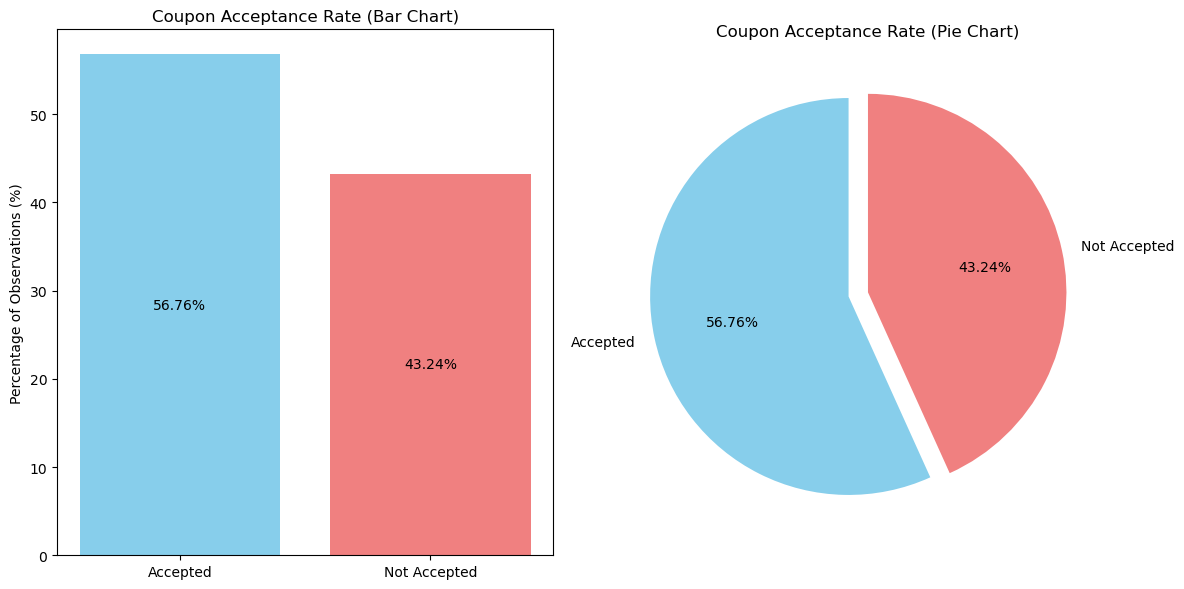

In [624]:
# Calculate coupon acceptance rate
coupon_acceptance_rate = (df['Y'] == 1).mean()
non_acceptance_rate = 1 - coupon_acceptance_rate

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot in the first column
axes[0].bar(
    [0, 1],
    [coupon_acceptance_rate * 100, non_acceptance_rate * 100],
    color=['skyblue', 'lightcoral']
)
axes[0].set_title("Coupon Acceptance Rate (Bar Chart)")
axes[0].set_ylabel("Percentage of Observations (%)")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Accepted', 'Not Accepted'])

# Add percentage labels to the bars
for i, v in enumerate([coupon_acceptance_rate * 100, non_acceptance_rate * 100]):
    axes[0].text(i, v / 2, f"{v:.2f}%", ha='center', va='center')

# Pie chart in the second column
coupon_acceptance_rate_values = df['Y'].value_counts(normalize=True)
axes[1].pie(
    coupon_acceptance_rate_values.values,
    labels=['Accepted', 'Not Accepted'],  # Update labels for pie chart
    autopct='%1.2f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.1, 0]
)
axes[1].set_title('Coupon Acceptance Rate (Pie Chart)')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('images/coupon_acceptance_rate.png')
plt.show()


## 5. Use a bar plot to visualize the `coupon` column.

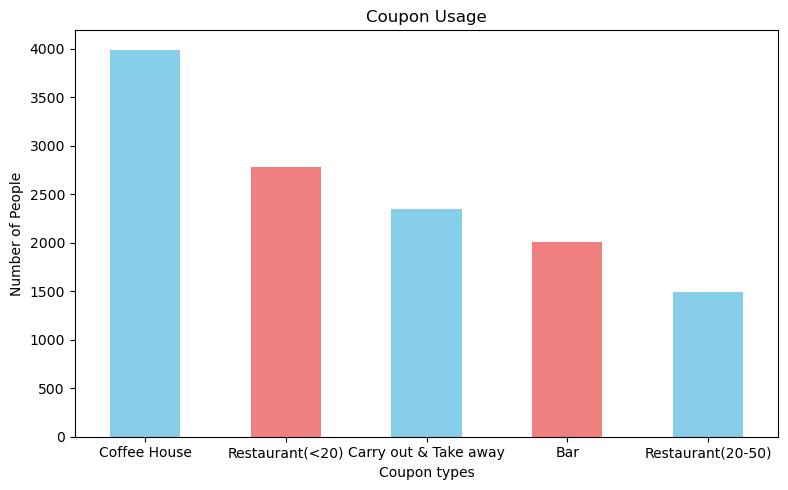

In [625]:
# Create a new figure for plotting
plt.figure(figsize=(8, 5))

# Create a bar chart of the number of people who used each coupon
df['coupon'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Coupon Usage")
plt.xlabel("Coupon types")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.tight_layout()

# Display plot
plt.show()

## 6. Use a histogram to visualize the temperature column.

In [626]:
fig = px.histogram(df, x='temperature', nbins=20, color='coupon', barmode="stack",
                   title='Distribution of Temperature')

fig.update_xaxes(title_text='Temperature (°F)')
fig.update_yaxes(title_text='Number of Observations')
fig.show()

In [627]:
fig = px.histogram(df, x='temperature', nbins=20, color='Y', barmode="stack",
                   title='Distribution of Temperature')

fig.update_xaxes(title_text='Temperature (°F)')
fig.update_yaxes(title_text='Number of Observations')
fig.show()

### Key Observations:

- **Temperature Influence**: Both histograms show temperature's significant role in the distribution of coupons and coupon acceptance. A specific range (like 60°F) seems to have a higher frequency for coupon acceptance.

- **Coupon Type and Usage**: The coupon histogram highlights differences in the types of coupons offered at various temperatures, suggesting that certain business categories (e.g., restaurants) are more likely to distribute coupons.

- **Acceptance Behavior**: The Y histogram suggests that coupon acceptance may be more likely within a specific temperature range (likely indicating a preference in certain weather conditions).


### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [628]:
print( df['coupon'].unique())
df_bar_related = df.query("coupon == 'Bar'")

# display values
print( df_bar_related['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['Bar']


2. What proportion of bar coupons were accepted?


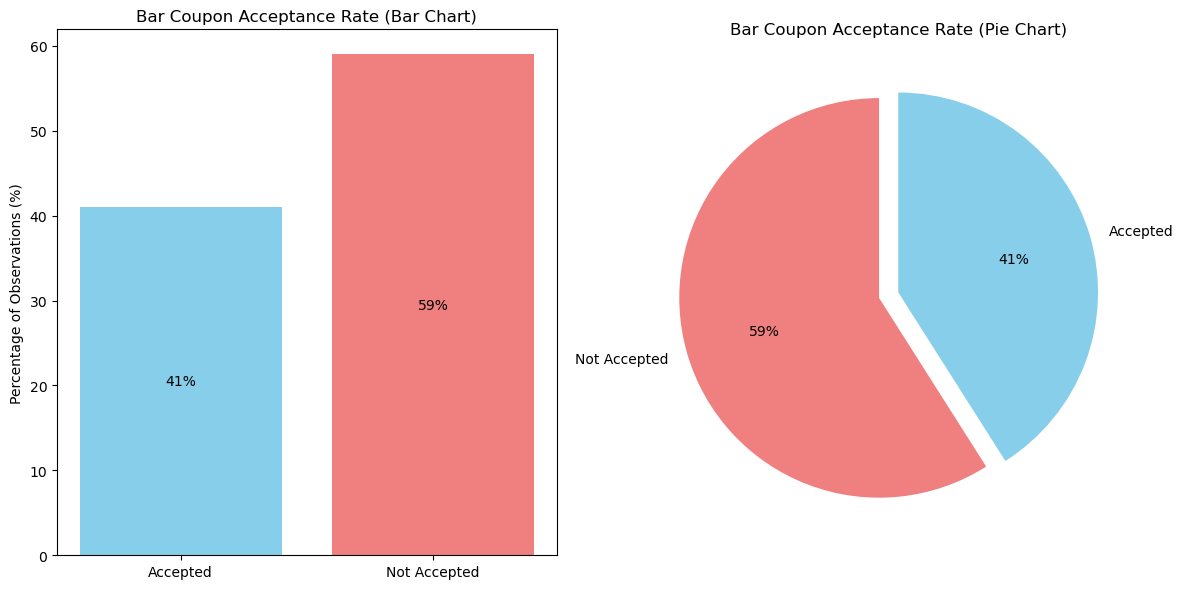

In [629]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

bar_coupon_acceptance_rate = (df_bar_related['Y'] == 1).mean()
bar_coupon_non_acceptance_rate = 1 - bar_coupon_acceptance_rate

# Bar plot in the first column
axes[0].bar(
    [0, 1],
    [bar_coupon_acceptance_rate * 100, bar_coupon_non_acceptance_rate * 100],
    color=['skyblue', 'lightcoral']
)
axes[0].set_title("Bar Coupon Acceptance Rate (Bar Chart)")
axes[0].set_ylabel("Percentage of Observations (%)")
axes[0].set_xticks([1, 0])
axes[0].set_xticklabels(['Not Accepted', 'Accepted'])

# Add percentage labels to the bars
for i, v in enumerate([bar_coupon_acceptance_rate * 100, bar_coupon_non_acceptance_rate * 100]):
    axes[0].text(i, v / 2, f"{v:.0f}%", ha='center', va='center')

# Get rate by normalization
bar_coupon_acceptance = df_bar_related['Y'].value_counts(normalize=True)
axes[1].pie(
    bar_coupon_acceptance.values,
    labels=['Not Accepted', 'Accepted'],  # Update labels for pie chart
    autopct='%1.0f%%',
    startangle=90,
    colors=['lightcoral','skyblue'],
    explode=[0.1, 0]
)
axes[1].set_title('Bar Coupon Acceptance Rate (Pie Chart)')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('images/bar_coupon_acceptance_rate.png')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [630]:
import re

# Function to calculate acceptance rates
def calculate_acceptance_rate(df, condition_column, condition_groups, group_labels, title, color_map):
    # Create the grouping column
    df[condition_column] = condition_groups
    df[condition_column] = df[condition_column].map({True: group_labels[0], False: group_labels[1]})

    # Calculate acceptance rates
    acceptance_rate = df.groupby(condition_column)['Y'].mean().reset_index()
    print(acceptance_rate)

    # Plot using Plotly Express
    fig = px.bar(acceptance_rate,
                 x=condition_column,
                 y='Y',
                 color=condition_column,
                 title=title,
                 labels={condition_column: 'Group types', 'Y': 'Average Acceptance Rate'},
                 color_discrete_map=color_map)

    # Sanitize title to create a valid filename
    filename = re.sub(r'[^\w\s-]', '', title).replace(' ', '_').lower().replace('comparison_of_acceptance_rate_','') + ".png"

    # Save the plot as a PNG file using Plotly's write_image method
    fig.write_image(f'images/{filename}')
    fig.show()

# Ensure you are working with a copy of the dataframe
df_bar_related = df_bar_related.copy()

In [631]:
# Compare acceptance rate: Bar <= 3 times vs. Bar > 3 times
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='bar_group',
    condition_groups=df_bar_related['bar_frequency'].apply(lambda x: x <= 3),
    group_labels=['3 or fewer times', 'More than 3 times'],
    title='Coupon Acceptance by Bar Visit Frequency',
    color_map={'3 or fewer times': 'skyblue', 'More than 3 times': 'lightcoral'}
)

           bar_group         Y
0   3 or fewer times  0.370514
1  More than 3 times  0.768844


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [632]:
# Compare: Bar > 1 time & Age > 25 vs. All Others
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='group_bar_age_over_25',
    condition_groups=(df_bar_related['bar_frequency'] >= 3) & (df_bar_related['age'] > 25),
    group_labels=['Bar > 1 time & Age > 25', 'All Others'],
    title='Comparison of Acceptance Rate by Bar Visit and Age',
    color_map={'Bar > 1 time & Age > 25': 'lightcoral', 'All Others': 'skyblue'}
)

     group_bar_age_over_25         Y
0               All Others  0.334591
1  Bar > 1 time & Age > 25  0.695238


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [633]:
# Compare: Bar > 1 time, No Kids, Not Farming/Fishing/Forestry
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='group_bar_gt1_no_kids_no_fff',
    condition_groups=(
        (df_bar_related['bar_frequency'] >= 3) &
        (df_bar_related['passanger'] != 'Kid(s)') &
        (df_bar_related['occupation'] != 'Farming Fishing & Forestry')
    ),
    group_labels=['Bar > 1 time & No kids passengers & Not FFoF', 'All Others'],
    title='Comparison of Acceptance Rate: Bar > 1 time, No Kids,Not Farming,Fishing & Forestry',
    color_map={'Bar > 1 time & No kids passengers & Not FFoF': 'skyblue', 'All Others': 'lightcoral'}
)

                   group_bar_gt1_no_kids_no_fff         Y
0                                    All Others  0.295408
1  Bar > 1 time & No kids passengers & Not FFoF  0.713249


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.


#### Compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [634]:
# Compare the acceptance rates: Bar > 1 time, No Kids, Not Widowed
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='group_bar_gt1_no_kids_no_widowed',
    condition_groups=(
        (df_bar_related['bar_frequency'] > 3) &
        (df_bar_related['passanger'] != 'Kid(s)') &
        (df_bar_related['maritalStatus'] != 'Widowed')
    ),
    group_labels=['Bar > 1, No Kids, Not Widowed', 'All Others'],
    title='Comparison of Acceptance Rate: Bar > 1 time, No Kids, Not Widowed',
    color_map={'Bar > 1, No Kids, Not Widowed': 'skyblue', 'All Others': 'lightcoral'}
)

  group_bar_gt1_no_kids_no_widowed         Y
0                       All Others  0.371633
1    Bar > 1, No Kids, Not Widowed  0.774869


#### Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30

In [635]:
# Compare the acceptance rates: Bar > 1 time and Age < 30
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='group_bar_gt1_lt_30',
    condition_groups=(
        (df_bar_related['bar_frequency'] > 0) &
        (df_bar_related['age'] < 30)
    ),
    group_labels=['Bar > 1, Age < 30', 'All Others'],
    title='Comparison of Acceptance Rate: Bar > 1 and Age < 30',
    color_map={'Bar > 1, Age < 30': 'skyblue', 'All Others': 'lightcoral'}
)

  group_bar_gt1_lt_30         Y
0          All Others  0.345345
1   Bar > 1, Age < 30  0.721739


#### Compare the acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.

In [636]:
df_bar_related['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'unknown', 'never'], dtype=object)

In [637]:
# Compare the acceptance rates: Restaurant visits > 4 times and Income < 50k
calculate_acceptance_rate(
    df=df_bar_related,
    condition_column='group_is_rest_gt4_income_lt_50',
    condition_groups=(
        (df_bar_related['restaurant_frequency'] > 4) &
        (df_bar_related['income_numeric'] < 50000)
    ),
    group_labels=['Restaurant > 4, Income < 50k', 'All Others'],
    title='Comparison of Acceptance Rate: Restaurant visits > 4 and Income < 50k',
    color_map={'Restaurant > 4, Income < 50k': 'skyblue', 'All Others': 'lightcoral'}
)


  group_is_rest_gt4_income_lt_50         Y
0                     All Others  0.400960
1   Restaurant > 4, Income < 50k  0.453488


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. **Drivers who go to bars more than once a month, have passengers that are not kids, and are not widowed:**
   - **Acceptance Rate for "Bar > 1, No Kids, Not Widowed"**: 77.49%
   - **Acceptance Rate for "All Others"**: 37.16%

   The score of this group is much higher than that of the general group, with 77.49% for this group and 37.16% for the general group.

2. **Drivers who go to bars more than once a month and are under the age of 30:**
   - **Acceptance Rate for "Bar > 1, Age < 30"**: 80.88%
   - **Acceptance Rate for "All Others"**: 38.10%

   An even higher percentage (80.88%) of the younger drivers (under 30 years) who frequent bars are accepting the coupons. This suggests that younger drivers are more likely to accept bar-related promotions whenever they go out more than once a month.

3. **Drivers who go to cheap restaurants more than 4 times a month and have income under $50K:**
   - **Acceptance Rate for "Bar > 4, Income < 50k"**: 45.35%
   - **Acceptance Rate for "All Others"**: 40.10%

   The drivers in this group show an acceptance rate of 45.35%, compared to the 40.10% rate for "All Others." This indicates a weak but positive relationship between the frequency of dining at cheap restaurants and coupon acceptance.

#### Hypotheses:

1. **Frequent Bar Patrons Are More Likely to Accept Bar-Related Coupons:**
   The results suggest that the more frequently a person visits bars, the greater their likelihood of accepting bar-related coupons. Both groups of drivers who go to bars regularly—those without children or who are not widowed, and those under 30—show significantly higher acceptance rates. This trend implies that social drinkers are more sensitized to bar and nightlife promotions, making them more likely to respond to related advertising.

2. **Young Drivers Are Especially Sensitive to Bar Promotions:**
   Drivers under the age of 30, particularly those who go to bars more than once a month, have the highest acceptance rate at 80.88%. This indicates that younger drivers are highly responsive to promotions linked to social activities like bar-going. It suggests that younger people are more inclined to engage with offers that align with their social habits, such as going to bars or nightlife spots.

3. **Income and Restaurant Frequency Show a Weaker Positive Relationship:**
   Drivers who go to cheap restaurants more than four times a month and have an income under $50,000 show a slightly higher acceptance rate (45.35%) compared to the general group (40.10%). While this indicates a positive relationship, it is relatively weak. The slightly higher acceptance rate suggests that factors like income and restaurant habits might play a role, but they do not have as strong an impact on coupon acceptance as bar-related behaviors do. This may indicate that dining and income factors are secondary influences compared to lifestyle behaviors like bar-going.

#### Overall Hypothesis:
Bar coupon-accepting drivers are most likely those who frequent bars, especially those who are under 30, have no children, or are not widowed. In terms of demographic factors, **age, social behavior, and drinking culture** seem to be the strongest predictors of bar coupon acceptance, outweighing income and restaurant usage as the key influencing factors.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

In [638]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()

# Calculate the number of rows needed based on the number of numeric columns
num_rows = (len(numeric_cols) + 3) // 4  # Round up to the nearest integer

# Create the subplot grid with the correct number of rows and columns
fig = make_subplots(rows=num_rows, cols=4, subplot_titles=numeric_cols)

for index, col in enumerate(numeric_cols):
    # Calculate the correct row and column indices
    row = index // 4 + 1  # Integer division for row
    col_index = index % 4 + 1 # Modulo operation for column

    fig.add_trace(
        go.Histogram(x=df[col]), row=row, col=col_index,
    )

fig.update_layout(height=800, width=1200, title_text="Numeric Value Analysis")
fig.show()

## Potential Insights:

- **Temperature and Coupon Acceptance:** It would be interesting to explore how temperature affects coupon acceptance. Are people more likely to use coupons in certain weather conditions?

- **Age and Coupon Acceptance:** Understanding how age influences coupon usage can help tailor marketing strategies. Are younger or older individuals more receptive to coupons?

- **Income and Coupon Acceptance:** Analyzing the relationship between income and coupon acceptance can provide insights into how economic factors impact consumer behavior.

- **Family Size and Coupon Acceptance:** Understanding how having children influences coupon usage can help target specific demographics.

- **Travel Patterns and Coupon Acceptance:** Analyzing the impact of travel direction and destination on coupon acceptance can help optimize coupon distribution strategies.

## Further Analysis:

The next step for gaining deeper insights is to conduct **Correlation Analysis**. This analysis will help identify relationships and dependencies between numerical variables, such as:

- Temperature and coupon acceptance
- Age and coupon acceptance
- Income and coupon acceptance
- Family size and coupon acceptance
- Travel patterns and coupon acceptance

By uncovering these correlations, we can gain a clearer understanding of the factors influencing coupon usage and target specific demographics more effectively.



## Correlation Analysis:

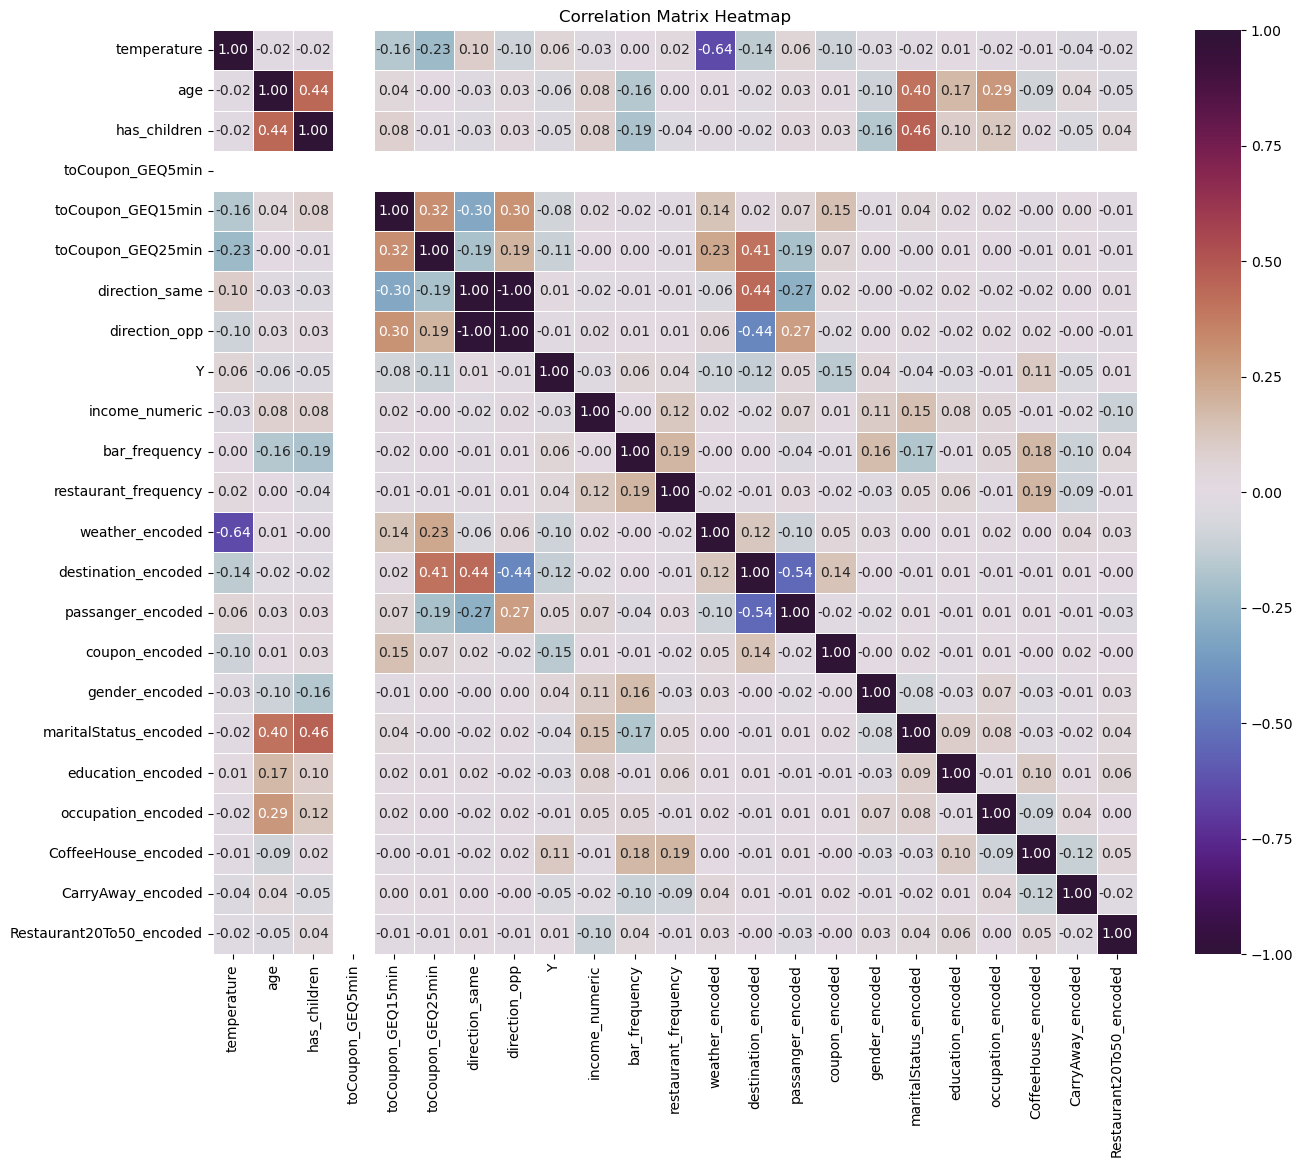

In [639]:
# Filter only numerical columns
df_numerical = df.select_dtypes(include=['number'])

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(
    df_numerical.corr(),
    annot=True,
    cmap="twilight_shifted",
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()

Here are the top 2 positive correlations from the matrix:

1. **`toCoupon_GEQ25min` vs `destination_encoded` (Correlation: 0.41)**
Suggests a moderate positive relationship between these two variables

2. **`direction_same` vs `destination_encoded` (Correlation: 0.44)**
This indicates a strong positive correlation between the destination of the passenger and coupon acceptance. Passengers with specific destinations are more likely to accept the coupon.

These correlations highlight factors that influence coupon acceptance, such as destination, direction, and coupon driving distance.


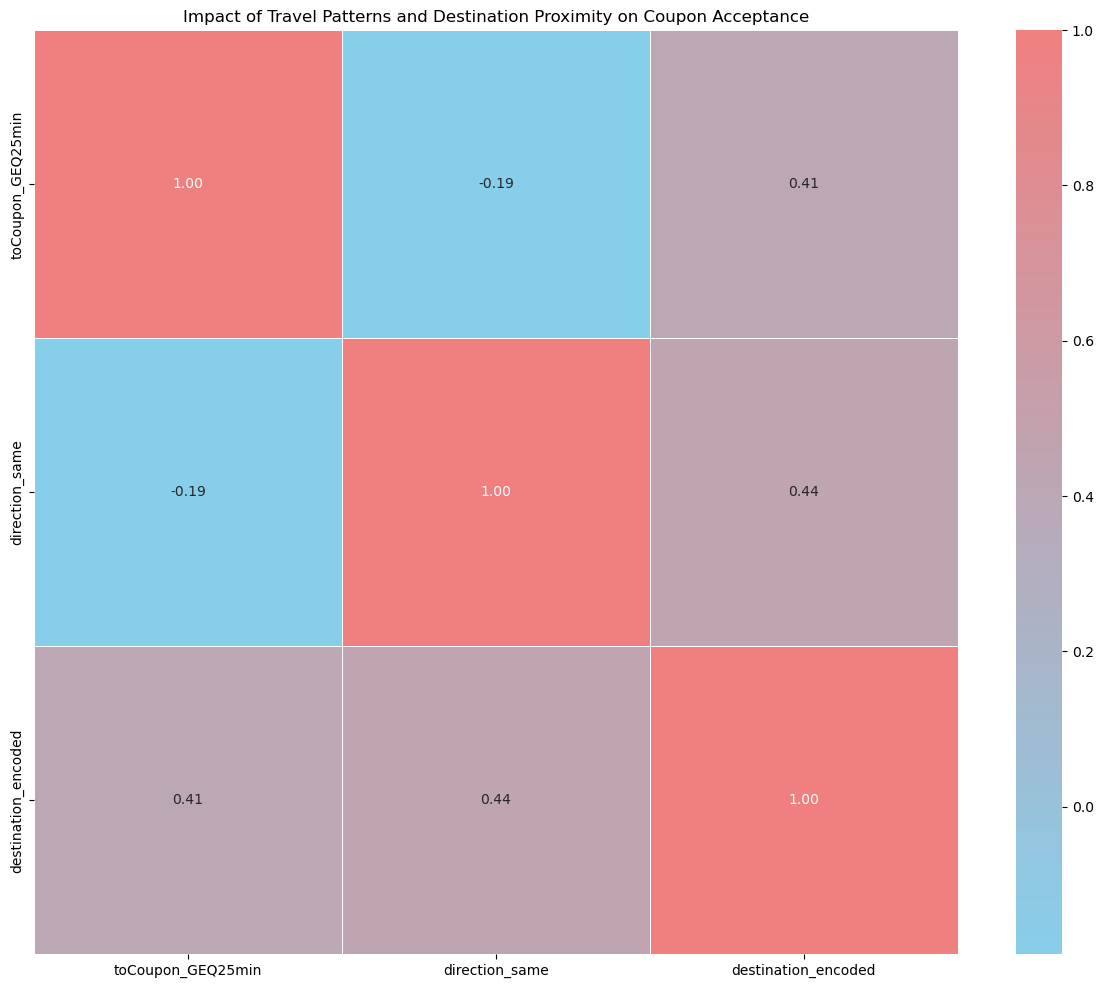

In [640]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap from 'skyblue' to 'lightcoral'
cmap = LinearSegmentedColormap.from_list("custom_skyblue_lightcoral", ["skyblue", "lightcoral"])

# Filter only numerical columns
df_numerical = df[['toCoupon_GEQ25min','direction_same','destination_encoded']]

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(
    df_numerical.corr(),
    annot=True,
    cmap=cmap,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Impact of Travel Patterns and Destination Proximity on Coupon Acceptance")
plt.savefig('images/correlation.png')
plt.show()

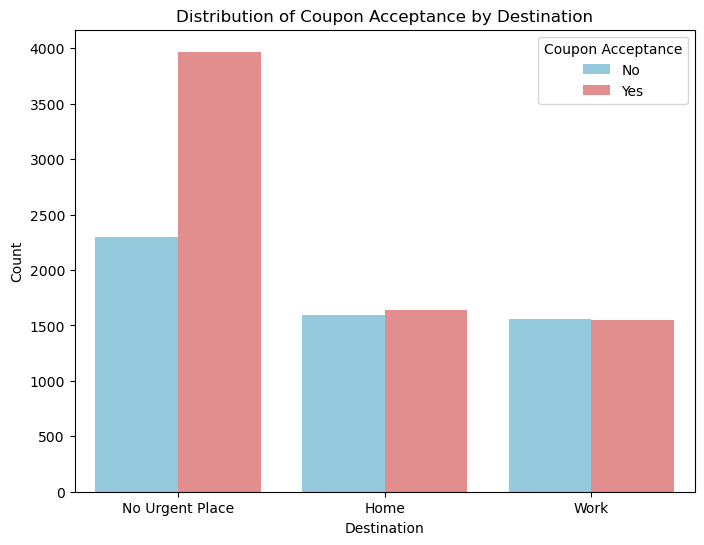

In [641]:
# Seaborn count plot to visualize the distribution of 'Y' across different 'destination_encoded'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='destination', hue='Y', palette=["skyblue", "lightcoral"])
plt.title('Distribution of Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Coupon Acceptance', labels=['No', 'Yes'])
plt.savefig('images/destination.png')
plt.show()


The chart clearly shows that coupon acceptance is significantly higher for destinations where there's no urgent place to go or when people are at home.

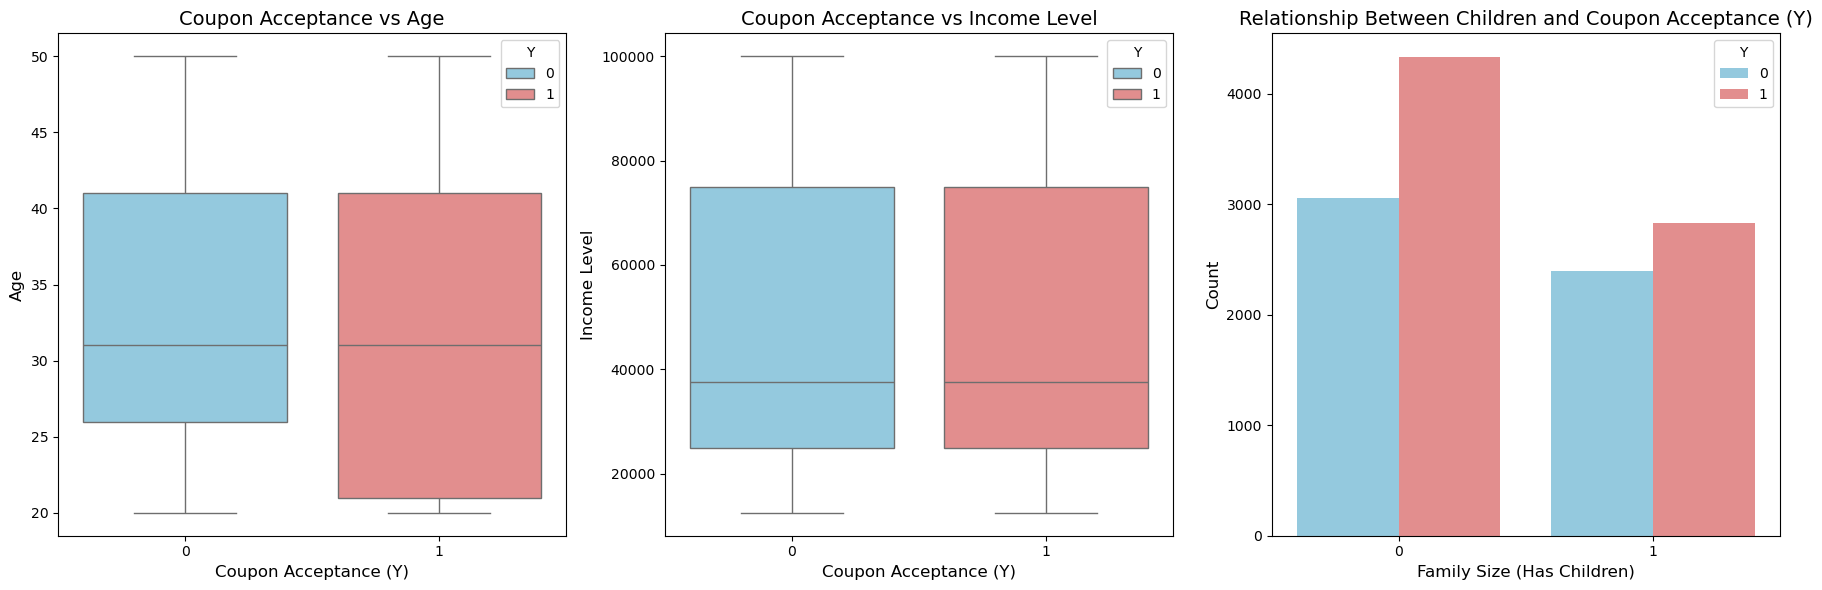

In [642]:
#Analyzing coupon acceptance based on age, income level, and family size can provide more granular insights.

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Coupon Acceptance vs Age (Boxplot)
sns.boxplot(x='Y', y='age', data=df, hue='Y', ax=axes[0], palette=["skyblue", "lightcoral"])
axes[0].set_title('Coupon Acceptance vs Age', fontsize=14)
axes[0].set_xlabel('Coupon Acceptance (Y)', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)

# Coupon Acceptance vs Income Level (Boxplot)
sns.boxplot(x='Y', y='income_numeric', data=df, hue='Y', ax=axes[1], palette=["skyblue", "lightcoral"])
axes[1].set_title('Coupon Acceptance vs Income Level', fontsize=14)
axes[1].set_xlabel('Coupon Acceptance (Y)', fontsize=12)
axes[1].set_ylabel('Income Level', fontsize=12)

# Coupon Acceptance vs Family Size (Count Plot)
sns.countplot(x='has_children', hue='Y', data=df, ax=axes[2], palette=["skyblue", "lightcoral"])
axes[2].set_title('Relationship Between Children and Coupon Acceptance (Y)', fontsize=14)
axes[2].set_xlabel('Family Size (Has Children)', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


plt.show()

### Implications for Businesses:

1. **Targeted Marketing**: Businesses can tailor their coupon campaigns to specific demographic segments. For example, they can offer more attractive deals to younger adults and lower-income individuals.

2. **Family-Friendly Offers**: Creating family-friendly deals and promotions can attract parents and increase customer loyalty.

3. **Digital Marketing**: Leveraging digital channels to reach younger adults and lower-income individuals with targeted coupon offers can be effective.

4. **Personalized Coupons**: Using data analytics to personalize coupon offers based on individual preferences and behaviors can enhance effectiveness.


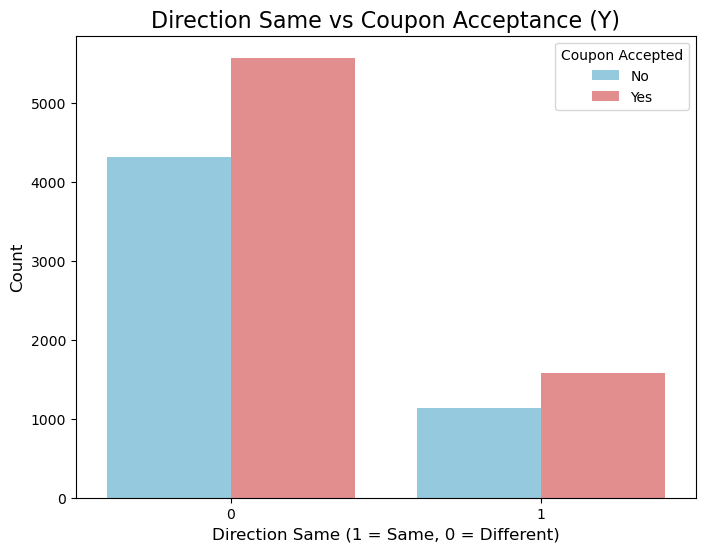

In [643]:
# Create a countplot to show the distribution of 'Y' based on 'direction_same'
plt.figure(figsize=(8, 6))
sns.countplot(x='direction_same', hue='Y', data=df, palette=["skyblue", "lightcoral"])

# Set plot labels and title
plt.title('Direction Same vs Coupon Acceptance (Y)', fontsize=16)
plt.xlabel('Direction Same (1 = Same, 0 = Different)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
plt.show()

### Key Observations:

- **Higher Acceptance for Same Direction:** Individuals traveling in the same direction as their destination (represented by "1" on the x-axis) exhibit a significantly higher rate of coupon acceptance compared to those traveling in a different direction ("0").
- **Consistent Trend:** The trend of higher coupon acceptance for those traveling in the same direction remains consistent across both acceptance categories (Coupon Accepted = No and Yes). This suggests that the direction of travel is a strong predictor of coupon acceptance, regardless of the final decision.

### Implications for Businesses:

- **Targeted Marketing:** Businesses can tailor their coupon campaigns to target individuals traveling in the same direction as their destination.
- **Timing and Location:** Offering coupons at specific locations or times that align with popular travel routes can increase effectiveness.
- **Digital Marketing:** Leveraging digital channels to reach travelers with targeted coupon offers can be effective, especially for those using navigation apps or travel websites.


# Previous analysis


In [644]:
coupon_counts = df['coupon'].value_counts()

# pie plotly showing percentages by coupon type
fig = px.pie(values=coupon_counts.values, names=coupon_counts.index, title='Coupon Type Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [645]:
# Let's take a deep dive into the coupon Coffee House since it has the highest acceptance rate.

df_coffe_house = df.query('coupon_encoded == 2')
df_coffe_house.head()

destination  passanger weather  temperature  time        coupon  \
1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15             Home      Alone   Sunny           80   6PM  Coffee House   

   expiration  gender   age      maritalStatus  ...  destination_encoded  \
1          2h  Female  21.0  Unmarried partner  ...                    1   
3          2h  Female  21.0  Unmarried partner  ...                    1   
4          1d  Female  21.0  Unmarried partner  ...                    1   
12         2h  Female  21.0  Unmarried partner  ...                    1   
15         2h  Female  21.0  Unmarried partner  ...                    2   

   passanger_encoded coupon_encoded gender_encoded maritalStatus_encoded  \
1                  2              2              1                     1   
3                  2              2              1                     1   
4                  2              2              1                     1   
12                 3              2              1                     1   
15                 1              2              1                     1   

   education_encoded occupation_encoded CoffeeHouse_encoded CarryAway_encoded  \
1                  1                  1                   1                 1   
3                  1                  1                   1                 1   
4                  1                  1                   1                 1   
12                 1                  1                   1                 1   
15                 1                  1                   1                 1   

   Restaurant20To50_encoded  
1                         1  
3                         1  
4                         1  
12                        1  
15                        1  

[5 rows x 40 columns]

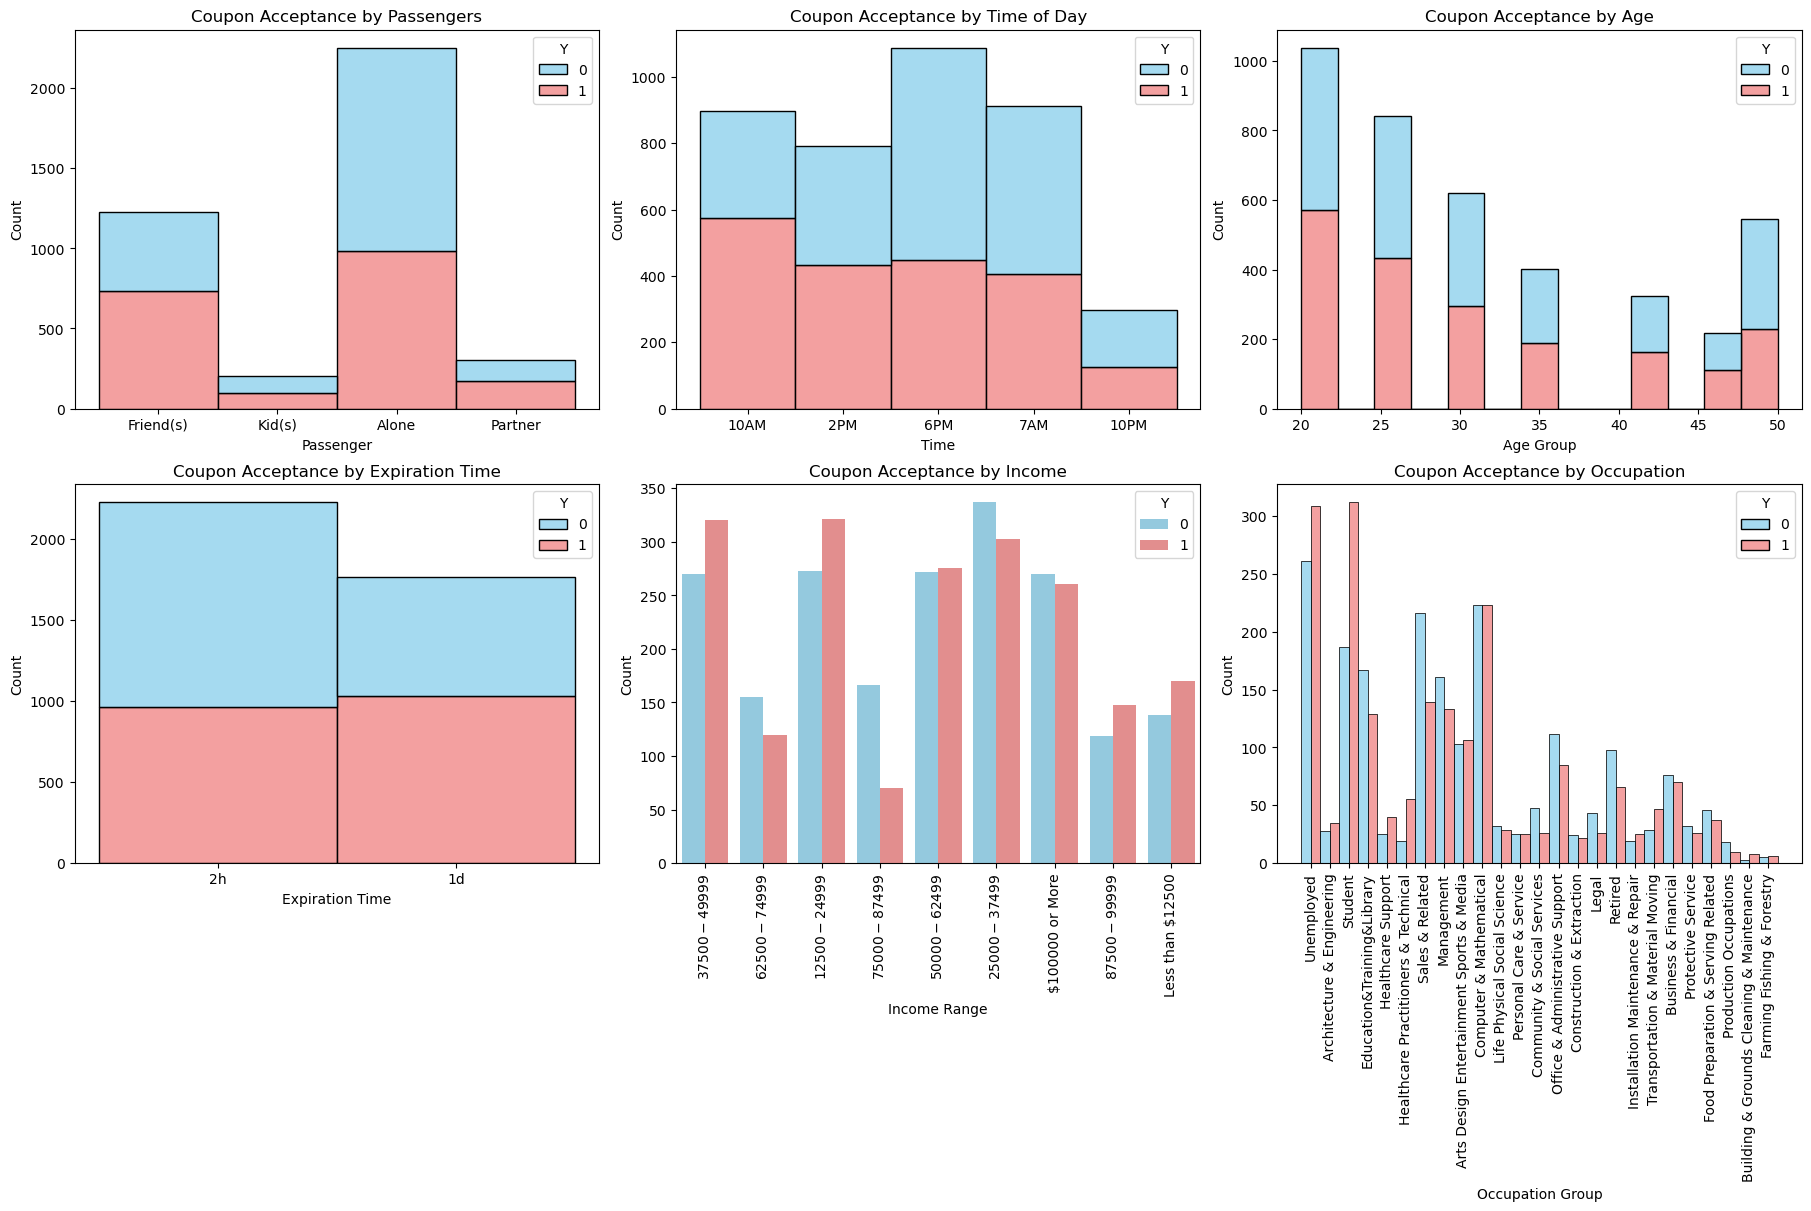

In [646]:
# Set up the figure and axes (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

# Plot 1: Passengers by Coupon Acceptance
sns.histplot(data=df_coffe_house, x="passanger", hue="Y", multiple="stack", ax=axes[0, 0], palette=["skyblue", "lightcoral"])
axes[0, 0].set_title('Coupon Acceptance by Passengers')
axes[0, 0].set_xlabel('Passenger')
axes[0, 0].set_ylabel('Count')

# Plot 2: Time of Day vs Coupon Acceptance
sns.histplot(data=df_coffe_house, x="time", hue="Y", multiple="stack", ax=axes[0, 1], palette=["skyblue", "lightcoral"])
axes[0, 1].set_title('Coupon Acceptance by Time of Day')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Count')

# Plot 3: Age vs Coupon Acceptance
sns.histplot(data=df_coffe_house, x="age", hue="Y", multiple="stack", ax=axes[0, 2], palette=["skyblue", "lightcoral"])
axes[0, 2].set_title('Coupon Acceptance by Age')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Count')

# Plot 4: Expiration vs Coupon Acceptance
sns.histplot(data=df_coffe_house, x="expiration", hue="Y", multiple="stack", ax=axes[1, 0], palette=["skyblue", "lightcoral"])
axes[1, 0].set_title('Coupon Acceptance by Expiration Time')
axes[1, 0].set_xlabel('Expiration Time')
axes[1, 0].set_ylabel('Count')

# Plot 5: Coupon Acceptance by Income
sns.countplot(data=df_coffe_house, x="income", hue="Y", ax=axes[1, 1], palette=["skyblue", "lightcoral"])
axes[1, 1].set_title('Coupon Acceptance by Income')
axes[1, 1].set_xlabel('Income Range')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=90)

sns.histplot(data=df_coffe_house, x="occupation", hue="Y", multiple="dodge", ax=axes[1, 2], palette=["skyblue", "lightcoral"])
axes[1, 2].set_title('Coupon Acceptance by Occupation')
axes[1, 2].set_xlabel('Occupation Group')
axes[1, 2].set_ylabel('Count')
plt.xticks(rotation=90)

plt.savefig('images/coffee_house_coupon_exploration.png')
# Show the plots
plt.show()



## Key Observations:

### 1. Coupon Acceptance by Passengers:
- **Solo Travelers**: Individuals traveling alone tend to have a lower coupon acceptance rate compared to those traveling with friends, family, or partners. This might be due to factors like budget constraints or a desire for a more personalized experience.
- **Family and Friends**: Groups of friends and families are more likely to accept coupons, possibly due to shared expenses or a collective decision-making process.

### 2. Coupon Acceptance by Time of Day:
- **Morning and Afternoon Peaks**: Coupon acceptance is highest during the morning and afternoon hours. This could be attributed to people planning their day and looking for deals, or perhaps a higher likelihood of impulsive decisions during these times.
- **Lower Acceptance in the Evening**: Coupon acceptance tends to decline in the evening, possibly due to fatigue, a desire to relax, or a shift in focus towards other activities.

### 3. Coupon Acceptance by Age:
- **Younger and Older Adults**: Younger and older adults seem to be more receptive to coupons. This could be due to factors like lower disposable income or a more cautious approach to spending.
- **Middle-Aged Individuals**: Middle-aged individuals show a lower tendency to accept coupons, possibly due to higher income levels or a different mindset towards spending.

### 4. Coupon Acceptance by Expiration Time:
- **Short-Term Offers**: Coupons with shorter expiration times (e.g., 2 hours) tend to have a higher acceptance rate. This could be due to a sense of urgency or a desire to take advantage of immediate savings.
- **Longer-Term Offers**: Coupons with longer expiration times (e.g., 1 day) have a lower acceptance rate. This might be because people are less likely to remember or plan for longer-term offers.

### 5. Coupon Acceptance by Income:
- **Lower Income**: Individuals with lower income levels are more likely to accept coupons. This aligns with the notion that coupons can help stretch budgets and save money.
- **Higher Income**: Higher-income individuals may be less inclined to use coupons, potentially due to a different mindset towards spending or a perception of coupons as a sign of financial constraint.

### 6. Coupon Acceptance by Occupation:
- **Unemployed**: The "Unemployed" occupation group shows significant coupon acceptance, with a higher count of accepted coupons (red bar) compared to declined ones (blue bar).
- **Healthcare & Related Occupations**: Occupations in healthcare, like "Healthcare Practitioners & Technical" show relatively high coupon acceptance, with more accepted coupons than declined ones.

## Implications for Businesses:

- **Targeted Marketing**: By understanding these patterns, businesses can tailor their coupon campaigns to specific demographics, travel times, and expiration durations.
- **Personalized Offers**: Using data analytics to personalize coupon offers based on individual preferences and behaviors can enhance effectiveness.
- **Time-Sensitive Promotions**: Leveraging time-sensitive promotions can drive immediate action and increase coupon redemption rates.
- **Family-Friendly Deals**: Creating family-friendly deals and promotions can attract families and increase customer loyalty.
